This note was completed based on [unsloth](https://github.com/unslothai/unsloth)'s [Llama3.1_(8B)-GRPO](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.1_(8B)-GRPO.ipynb#scrollTo=qtcz_lpbVC92).

### Installation

In [1]:
import os
os.environ["VLLM_USE_V1"] = "0"
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"
os.environ["CUDA_VISIBLE_DEVICES"] = "7"
from IPython.display import display, Markdown
!pip install unsloth vllm

### Unsloth

Load up `Llama 3.1 8B Instruct`, and set parameters

In [2]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 1024 # Can increase for longer reasoning traces
lora_rank = 32 # Larger rank = smarter, but slower

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "meta-llama/meta-Llama-3.1-8B-Instruct",
    max_seq_length = max_seq_length,
    load_in_4bit = True, # False for LoRA 16bit
    fast_inference = True, # Enable vLLM fast inference
    max_lora_rank = lora_rank,
    gpu_memory_utilization = 0.6, # Reduce if out of memory
)

model = FastLanguageModel.get_peft_model(
    model,
    r = lora_rank, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
    ], # Remove QKVO if out of memory
    lora_alpha = lora_rank,
    use_gradient_checkpointing = "unsloth", # Enable long context finetuning
    random_state = 3407,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/home/zxy/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!
INFO 05-12 10:52:21 [importing.py:53] Triton module has been replaced with a placeholder.
INFO 05-12 10:52:21 [__init__.py:239] Automatically detected platform cuda.


2025-05-12 10:52:22,762	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


==((====))==  Unsloth 2025.4.7: Fast Llama patching. Transformers: 4.51.3. vLLM: 0.8.5.post1.
   \\   /|    NVIDIA GeForce RTX 3090. Num GPUs = 1. Max memory: 23.691 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: vLLM loading unsloth/meta-llama-3.1-8b-instruct-unsloth-bnb-4bit with actual GPU utilization = 59.23%
Unsloth: Your GPU has CUDA compute capability 8.6 with VRAM = 23.69 GB.
Unsloth: Using conservativeness = 1.0. Chunked prefill tokens = 1024. Num Sequences = 192.
Unsloth: vLLM's KV Cache can use up to 7.86 GB. Also swap space = 6 GB.
INFO 05-12 10:52:43 [config.py:717] This model supports multiple tasks: {'reward', 'generate', 'score', 'embed', 'classify'}. Defaulting to 'generate'.
Unsloth: vLLM

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:02<00:00,  2.10s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:02<00:00,  2.10s/it]

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:02<00:00,  2.07s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:02<00:00,  2.08s/it]


INFO 05-12 10:52:53 [punica_selector.py:18] Using PunicaWrapperGPU.


INFO 05-12 10:52:54 [model_runner.py:1140] Model loading took 5.7737 GiB and 7.659036 seconds
INFO 05-12 10:52:57 [worker.py:287] Memory profiling takes 3.47 seconds
INFO 05-12 10:52:57 [worker.py:287] the current vLLM instance can use total_gpu_memory (23.69GiB) x gpu_memory_utilization (0.59) = 14.03GiB
INFO 05-12 10:52:57 [worker.py:287] model weights take 5.77GiB; non_torch_memory takes 0.06GiB; PyTorch activation peak memory takes 0.90GiB; the rest of the memory reserved for KV Cache is 7.31GiB.
INFO 05-12 10:52:58 [executor_base.py:112] # cuda blocks: 3741, # CPU blocks: 3072
INFO 05-12 10:52:58 [executor_base.py:117] Maximum concurrency for 1024 tokens per request: 58.45x
INFO 05-12 10:53:02 [model_runner.py:1450] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decrea

Capturing CUDA graph shapes: 100%|██████████| 27/27 [00:28<00:00,  1.05s/it]

INFO 05-12 10:53:31 [model_runner.py:1592] Graph capturing finished in 28 secs, took 3.18 GiB
INFO 05-12 10:53:31 [llm_engine.py:437] init engine (profile, create kv cache, warmup model) took 37.15 seconds



Unsloth 2025.4.7 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


### Data Preparation

This code block primarily focuses on **data preparation** and defining **reward functions**. The goal is to train or evaluate a language model to answer `gsm8k` math problems following a specific XML format (containing `<reasoning>` and `<answer>` tags).

**Key Steps:**

1.  **Import Libraries**:
    * `re`: For regular expressions, used to validate output formats.
    * `datasets`: For loading and processing the `gsm8k` dataset.

2.  **Define Output Format**:
    * `SYSTEM_PROMPT`: An instruction for the model, requiring its output to follow the `<reasoning>...</reasoning><answer>...</answer>` structure.
    * `XML_COT_FORMAT`: An f-string template for programmatically generating text in this structure.

3.  **Answer Extraction Utilities**:
    * `extract_xml_answer`: Extracts content from within the `<answer>` tags of the model's XML response.
    * `extract_hash_answer`: Extracts the standard answer from the original `gsm8k` dataset's format (typically found after `####`).

4.  **Dataset Loading & Preprocessing (`get_gsm8k_questions`)**:
    * Loads the `gsm8k` dataset.
    * Formats each question into a chat input, including the `SYSTEM_PROMPT` and the user's question.
    * Extracts and stores the ground truth answer.

5.  **Reward Functions**:
    * These functions take the model's outputs (`completions`) and return a numerical reward based on different criteria.
    * `correctness_reward_func`: Checks if the extracted answer exactly matches the ground truth answer (rewards `2.0` or `0.0`).
    * `int_reward_func`: Checks if the extracted answer consists purely of digits (rewards `0.5` or `0.0`).
    * `strict_format_reward_func`: Strictly checks if the output perfectly matches the predefined XML structure (including newlines).
    * `soft_format_reward_func`: More leniently checks for the presence of `<reasoning>` and `<answer>` tag pairs.
    * `xmlcount_reward_func` (with `count_xml`): Provides a more granular reward for correct XML tag usage and penalizes extraneous characters after the tags.

These components collectively provide training signals for the model to learn how to generate structured and correct answers.

In [3]:
import re
from datasets import load_dataset, Dataset

# Load and prep dataset
SYSTEM_PROMPT = """
Respond in the following format:
<reasoning>
...
</reasoning>
<answer>
...
</answer>
"""

XML_COT_FORMAT = """\
<reasoning>
{reasoning}
</reasoning>
<answer>
{answer}
</answer>
"""

def extract_xml_answer(text: str) -> str:
    answer = text.split("<answer>")[-1]
    answer = answer.split("</answer>")[0]
    return answer.strip()

def extract_hash_answer(text: str) -> str | None:
    if "####" not in text:
        return None
    return text.split("####")[1].strip()

# uncomment middle messages for 1-shot prompting
def get_gsm8k_questions(split = "train") -> Dataset:
    data = load_dataset('openai/gsm8k', 'main')[split] # type: ignore
    data = data.map(lambda x: { # type: ignore
        'prompt': [
            {'role': 'system', 'content': SYSTEM_PROMPT},
            {'role': 'user', 'content': x['question']}
        ],
        'answer': extract_hash_answer(x['answer'])
    }) # type: ignore
    return data # type: ignore

dataset = get_gsm8k_questions()

# Reward functions
def correctness_reward_func(prompts, completions, answer, **kwargs) -> list[float]:
    responses = [completion[0]['content'] for completion in completions]
    q = prompts[0][-1]['content']
    extracted_responses = [extract_xml_answer(r) for r in responses]
    print('-'*20, f"Question:\n{q}", f"\nAnswer:\n{answer[0]}", f"\nResponse:\n{responses[0]}", f"\nExtracted:\n{extracted_responses[0]}")
    return [2.0 if r == a else 0.0 for r, a in zip(extracted_responses, answer)]

def int_reward_func(completions, **kwargs) -> list[float]:
    responses = [completion[0]['content'] for completion in completions]
    extracted_responses = [extract_xml_answer(r) for r in responses]
    return [0.5 if r.isdigit() else 0.0 for r in extracted_responses]

def strict_format_reward_func(completions, **kwargs) -> list[float]:
    """Reward function that checks if the completion has a specific format."""
    pattern = r"^<reasoning>\n.*?\n</reasoning>\n<answer>\n.*?\n</answer>\n$"
    responses = [completion[0]["content"] for completion in completions]
    matches = [re.match(pattern, r) for r in responses]
    return [0.5 if match else 0.0 for match in matches]

def soft_format_reward_func(completions, **kwargs) -> list[float]:
    """Reward function that checks if the completion has a specific format."""
    pattern = r"<reasoning>.*?</reasoning>\s*<answer>.*?</answer>"
    responses = [completion[0]["content"] for completion in completions]
    matches = [re.match(pattern, r) for r in responses]
    return [0.5 if match else 0.0 for match in matches]

def count_xml(text) -> float:
    count = 0.0
    if text.count("<reasoning>\n") == 1:
        count += 0.125
    if text.count("\n</reasoning>\n") == 1:
        count += 0.125
    if text.count("\n<answer>\n") == 1:
        count += 0.125
        count -= len(text.split("\n</answer>\n")[-1])*0.001
    if text.count("\n</answer>") == 1:
        count += 0.125
        count -= (len(text.split("\n</answer>")[-1]) - 1)*0.001
    return count

def xmlcount_reward_func(completions, **kwargs) -> list[float]:
    contents = [completion[0]["content"] for completion in completions]
    return [count_xml(c) for c in contents]

## GRPO Trainer: `_prepare_inputs` (Variable Aligned)

1.  **Process Inputs & Tokenize**: Takes `inputs`, extracts `prompts`, applies chat templates to get `prompts_text`, and tokenizes them into `prompt_ids` and `prompt_mask`.
2.  **Sample Completions (`y ~ pi_theta(.|x)`)**: Generates multiple completions `prompt_completion_ids` for each prompt using `self.model.generate`.
3.  **Calculate Reference Log Probs (`log pi_ref(y|x)`)**: Computes log probabilities of the combined `prompt_completion_ids` under the reference policy (`self.ref_model` or frozen `self.model`).
4.  **Calculate Rewards (`R(x, y)`)**: Evaluates each generated text completion (`completions` or `completions_text`) using reward functions (`self.reward_funcs`), stores per-function scores in `rewards_per_func`, applies weights (`self.reward_weights`), and sums them into the final `rewards` tensor.
5.  **Calculate Group-wise Advantages (`Adv(x, y)`)**: Groups `rewards` by prompt (`rewards.view(-1, self.num_generations)`), calculates the mean and std dev within each group (`mean_grouped_rewards`, `std_grouped_rewards` - note: these are repeated before division in the code), and computes the normalized `advantages = (rewards - mean_grouped_rewards) / (std_grouped_rewards + 1e-4)`.
6.  **Return Tensors**: Outputs a dictionary including `prompt_ids`, `prompt_mask`, `completion_ids`, `completion_mask`, `ref_per_token_logps`, and `advantages`.

In [39]:
from trl import GRPOConfig, GRPOTrainer

class GRPOTrainerInputPart(GRPOTrainer):
    def _prepare_inputs(self, inputs):
        device = self.accelerator.device
        prompts = [x["prompt"] for x in inputs]
        prompts_text = [maybe_apply_chat_template(example, self.processing_class)["prompt"] for example in inputs]
        prompt_inputs = self.processing_class(
            prompts_text, return_tensors="pt", padding=True, padding_side="left", add_special_tokens=False
        )
        prompt_inputs = super()._prepare_inputs(prompt_inputs)
        prompt_ids, prompt_mask = prompt_inputs["input_ids"], prompt_inputs["attention_mask"]

        prompt_completion_ids = self.unwrapped_model.generate(
            prompt_ids, attention_mask=prompt_mask, generation_config=self.generation_config
        )

        # Compute prompt length and extract completion ids
        prompt_length = prompt_ids.size(1)
        prompt_ids = prompt_completion_ids[:, :prompt_length]
        completion_ids = prompt_completion_ids[:, prompt_length:]

        # Mask everything after the first EOS token
        is_eos = completion_ids == self.processing_class.eos_token_id
        eos_idx = torch.full((is_eos.size(0),), is_eos.size(1), dtype=torch.long, device=device)
        eos_idx[is_eos.any(dim=1)] = is_eos.int().argmax(dim=1)[is_eos.any(dim=1)]
        sequence_indices = torch.arange(is_eos.size(1), device=device).expand(is_eos.size(0), -1)
        completion_mask = (sequence_indices <= eos_idx.unsqueeze(1)).int()

        # Concatenate prompt_mask with completion_mask for logit computation
        attention_mask = torch.cat([prompt_mask, completion_mask], dim=1)  # (B*G, P+C)

        logits_to_keep = completion_ids.size(1)  # we only need to compute the logits for the completion tokens

        with torch.inference_mode():
            ref_per_token_logps = self._get_per_token_logps(
                self.ref_model, prompt_completion_ids, attention_mask, logits_to_keep
            )

        # Decode the generated completions
        completions_text = self.processing_class.batch_decode(completion_ids, skip_special_tokens=True)
        completions = completions_text

        rewards_per_func = torch.zeros(len(prompts), len(self.reward_funcs), device=device)
        for i, (reward_func, reward_processing_class) in enumerate(
            zip(self.reward_funcs, self.reward_processing_classes)
        ):
            if isinstance(reward_func, nn.Module):  # Module instead of PretrainedModel for compat with compiled models
                if is_conversational(inputs[0]):
                    messages = [{"messages": p + c} for p, c in zip(prompts, completions)]
                    texts = [apply_chat_template(x, reward_processing_class)["text"] for x in messages]
                else:
                    texts = [p + c for p, c in zip(prompts, completions)]
                reward_inputs = reward_processing_class(
                    texts, return_tensors="pt", padding=True, padding_side="right", add_special_tokens=False
                )
                reward_inputs = super()._prepare_inputs(reward_inputs)
                with torch.inference_mode():
                    rewards_per_func[:, i] = reward_func(**reward_inputs).logits[:, 0]  # Shape (B*G,)
            else:
                # Repeat all input columns (but "prompt" and "completion") to match the number of generations
                keys = [key for key in inputs[0] if key not in ["prompt", "completion"]]
                reward_kwargs = {key: [example[key] for example in inputs] for key in keys}
                output_reward_func = reward_func(prompts=prompts, completions=completions, **reward_kwargs)
                rewards_per_func[:, i] = torch.tensor(output_reward_func, dtype=torch.float32, device=device)

        # Gather the reward per function: this part is crucial, because the rewards are normalized per group and the
        # completions may be distributed across processes
        rewards_per_func = gather(rewards_per_func)

        # Apply weights to each reward function's output and sum
        rewards = (rewards_per_func * self.reward_weights.to(device).unsqueeze(0)).sum(dim=1)

        # Compute grouped-wise rewards
        mean_grouped_rewards = rewards.view(-1, self.num_generations).mean(dim=1)
        std_grouped_rewards = rewards.view(-1, self.num_generations).std(dim=1)

        # Normalize the rewards to compute the advantages
        mean_grouped_rewards = mean_grouped_rewards.repeat_interleave(self.num_generations, dim=0)
        std_grouped_rewards = std_grouped_rewards.repeat_interleave(self.num_generations, dim=0)
        advantages = (rewards - mean_grouped_rewards) / (std_grouped_rewards + 1e-4)

        # Slice to keep only the local part of the data
        process_slice = slice(
            self.accelerator.process_index * len(prompts),
            (self.accelerator.process_index + 1) * len(prompts),
        )
        advantages = advantages[process_slice]


        return {
            "prompt_ids": prompt_ids,
            "prompt_mask": prompt_mask,
            "completion_ids": completion_ids,
            "completion_mask": completion_mask,
            "ref_per_token_logps": ref_per_token_logps,
            "advantages": advantages,
        }

## GRPO Trainer: `compute_loss`

1.  **Calculate Policy Log Probs (`log pi_theta(y|x)`)**: Computes log probabilities of the completions under the current policy $\pi_{\theta}$ being trained.
2.  **Calculate KL Divergence (`KL(pi_theta || pi_ref)`)**: Estimates the KL divergence between the current and reference policies using their log probabilities.
3.  **Calculate GRPO Loss**: Computes the final loss by combining the policy gradient term (using importance sampling ratios and advantages) and the KL divergence penalty, then averaging over the batch.

In [41]:
class GRPOTrainerLossPart(GRPOTrainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        if return_outputs:
            raise ValueError("The GRPOTrainer does not support returning outputs")
        # Compute the per-token log probabilities for the model

        prompt_ids, prompt_mask = inputs["prompt_ids"], inputs["prompt_mask"]
        completion_ids, completion_mask = inputs["completion_ids"], inputs["completion_mask"]
        input_ids = torch.cat([prompt_ids, completion_ids], dim=1)
        attention_mask = torch.cat([prompt_mask, completion_mask], dim=1)
        logits_to_keep = completion_ids.size(1)  # we only need to compute the logits for the completion tokens

        per_token_logps = self._get_per_token_logps(model, input_ids, attention_mask, logits_to_keep)

        # Compute the KL divergence between the model and the reference model
        ref_per_token_logps = inputs["ref_per_token_logps"]
        per_token_kl = torch.exp(ref_per_token_logps - per_token_logps) - (ref_per_token_logps - per_token_logps) - 1

        # x - x.detach() allows for preserving gradients from x
        advantages = inputs["advantages"]
        per_token_loss = torch.exp(per_token_logps - per_token_logps.detach()) * advantages.unsqueeze(1)
        per_token_loss = -(per_token_loss - self.beta * per_token_kl)
        loss = ((per_token_loss * completion_mask).sum(dim=1) / completion_mask.sum(dim=1)).mean()


        return loss

In [ ]:
max_prompt_length = 256
max_steps = 5 # it should be at least 250 for a full training run

training_args = GRPOConfig(
    learning_rate = 5e-6,
    adam_beta1 = 0.9,
    adam_beta2 = 0.99,
    weight_decay = 0.1,
    warmup_ratio = 0.1,
    lr_scheduler_type = "cosine",
    optim = "paged_adamw_8bit",
    logging_steps = 1,
    per_device_train_batch_size = 1,
    gradient_accumulation_steps = 1, # Increase to 4 for smoother training
    num_generations = 6, # Decrease if out of memory
    max_prompt_length = max_prompt_length,
    max_completion_length = max_seq_length - max_prompt_length,
    # num_train_epochs = 1, # Set to 1 for a full training run
    max_steps = 5,
    save_steps = 250,
    max_grad_norm = 0.1,
    report_to = "none", # Can use Weights & Biases
    output_dir = "outputs",
)

Unsloth: We now expect `per_device_train_batch_size` to be a multiple of `num_generations`.
We will change the batch size of 1 to the `num_generations` of 6


In [5]:
trainer = GRPOTrainer(
    model = model,
    processing_class = tokenizer,
    reward_funcs = [
        xmlcount_reward_func,
        soft_format_reward_func,
        strict_format_reward_func,
        int_reward_func,
        correctness_reward_func,
    ],
    args = training_args,
    train_dataset = dataset,
)
trainer.train()

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 7,473 | Num Epochs = 1 | Total steps = 5
O^O/ \_/ \    Batch size per device = 6 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (6 x 1 x 1) = 6
 "-____-"     Trainable parameters = 83,886,080/8,000,000,000 (1.05% trained)


-------------------- Question:
A concert ticket costs $40. Mr. Benson bought 12 tickets and received a 5% discount for every ticket bought that exceeds 10. How much did Mr. Benson pay in all? 
Answer:
476 
Response:
Let's break down the problem into parts.

The first 10 tickets cost the full price of $40 each.
The remaining tickets, which is 12 - 10 = 2 tickets, get a 5% discount.

To calculate the discount on each ticket, we first find 5% of $40.
5% of $40 = 0.05 * $40 = $2

The discount on each discount-eligible ticket is $2.

So the price of each discounted ticket is $40 - $2 = $38. Since there are 2 of these tickets, their total price is 2 * $38 = $76.

The price of the full-priced tickets is 10 * $40 = $400.

To find the total amount paid by Mr. Benson, we add the cost of full-priced and discounted tickets together.
Total cost = $400 + $76 = $476

<answer> $476 </answer> 
Extracted:
$476


Step,Training Loss,reward,reward_std,completion_length,kl,rewards / xmlcount_reward_func,rewards / soft_format_reward_func,rewards / strict_format_reward_func,rewards / int_reward_func,rewards / correctness_reward_func
1,0.000000,0.361000,0.929085,167.166672,0.000000,-0.055667,0.000000,0.000000,0.083333,0.333333
2,0.000000,0.000000,0.000000,448.333344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,-0.044000,0.107778,163.166672,0.000289,-0.044000,0.000000,0.000000,0.000000,0.000000
4,0.000000,1.073667,1.217584,196.833344,0.000332,-0.176333,0.000000,0.000000,0.250000,1.000000
5,0.000000,0.364500,0.892839,140.666672,0.000557,-0.052167,0.000000,0.000000,0.083333,0.333333


-------------------- Question:
Jane is trying to decide whether to buy a house or a trailer. A house costs $480,000 and a trailer costs $120,000. Each loan will be paid in monthly installments over 20 years. How much more is the monthly payment on the house compared to the trailer? 
Answer:
1500 
Response:
Let's break down the problem step by step. To find the monthly payments for each option, we will need to calculate the total amount paid out as a loan as a percentage of the cost of the property, which is called the interest rate. Since we do not have that information, we will assume a standard mortgage for separate calculations, the common rate is 4%.  

First, we will need to calculate the present value of payments for both the house and the trailer for 20 years at a constant interest rate of 4%.

1. The formula for monthly payment for a loan is given by [A (PMT) = P [ i(1 + i)^n]/[(1 + i)^n – 1], where I is the monthly interest rate and n is the number of payments.

First, we will

TrainOutput(global_step=5, training_loss=9.431196398423935e-06, metrics={'train_runtime': 110.6659, 'train_samples_per_second': 0.271, 'train_steps_per_second': 0.045, 'total_flos': 0.0, 'train_loss': 9.431196398423935e-06})

Checkpoint 250 exists, loading...


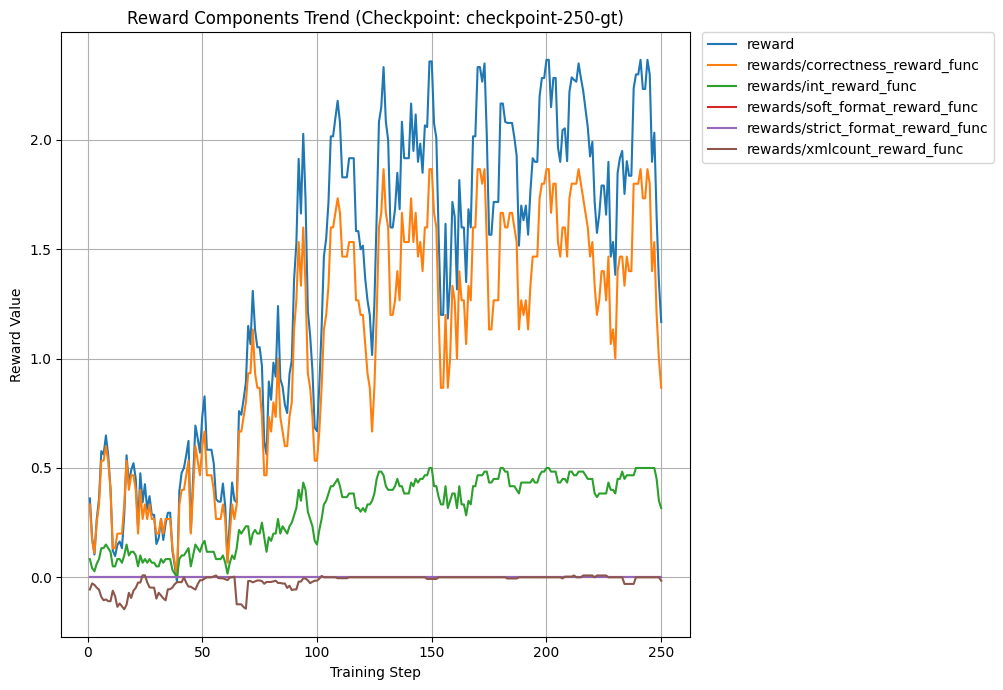

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import json
output_dir = Path("outputs")
# check if checkpoint 250_gt exists
if (output_dir / "checkpoint-250-gt").exists():
	print("Checkpoint 250 exists, loading...")
	json_path = output_dir / "checkpoint-250-gt" / "trainer_state.json"
else:
    # find max checkpoint
	max_checkpoint = max([int(d.name.split("-")[1]) for d in output_dir.iterdir() if d.is_dir()])
	print(f"Max checkpoint: {max_checkpoint}")
	json_path = output_dir / f"checkpoint-{max_checkpoint}" / "trainer_state.json"	
 
with open(json_path, "r") as f:
	trainer_state = json.load(f)
 
log_history = trainer_state["log_history"]
df = pd.DataFrame(log_history)

reward_cols = ['reward'] + [col for col in df.columns if col.startswith('rewards/')]
reward_cols = [col for col in reward_cols if col in df.columns] 
for col in reward_cols:
	df[col] = df[col].rolling(window=5, min_periods=1).mean()
df_long = pd.melt(df, id_vars=['step'], value_vars=reward_cols,
					var_name='Reward Type', value_name='Value')

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_long, x="step", y="Value", hue="Reward Type")

plt.title(f'Reward Components Trend (Checkpoint: {json_path.parent.name})')
plt.xlabel('Training Step')
plt.ylabel('Reward Value')
plt.grid(True)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()

## Inference
We test our model by the following question:

```
If 50 identical machines can make 50 identical parts in 50 minutes, how many minutes would it take for 5 such machines to make 5 identical parts?
```

The answer is 50. The reference solution generated by Gemini 2.5 Pro is:

```
**Reasoning and Answer:**

* From the statement "50 identical machines can make 50 identical parts in 50 minutes," we first find the time it takes for a single machine to do its work. Since the 50 machines work in parallel and finish the 50 parts together in 50 minutes, it means **it takes 50 minutes for 1 machine to make 1 part.**
* Now, we consider the scenario with 5 machines making 5 parts. Each of these 5 machines is responsible for making 1 part.
* Since they work in parallel, and each machine takes 50 minutes to make its part, the group of 5 machines will complete the task (making 5 parts) when the individual machines finish.
* Therefore, it will take 50 minutes for 5 machines to make 5 parts.

**Answer:** 50 minutes
```

Now let's try the model we just trained! First, let's first try the model without any GRPO trained.

In [6]:
question = "If 50 identical machines can make 50 identical parts in 50 minutes, how many minutes would it take for 5 such machines to make 5 identical parts?"

In [7]:
text = tokenizer.apply_chat_template([
    {"role" : "system", "content" : SYSTEM_PROMPT},
    {"role" : "user", "content" : ""},
], tokenize = False, add_generation_prompt = True)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 0.8,
    top_p = 0.95,
    max_tokens = 1024,
)
output = model.fast_generate(
    [text],
    sampling_params = sampling_params,
    lora_request = None,
)[0].outputs[0].text

display(Markdown(output))

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s, est. speed input: 109.19 toks/s, output: 50.83 toks/s]


I'm not seeing a question. Please go ahead and ask me a question so I can provide an answer in the requested format.

In [8]:
model.save_lora("grpo_saved_lora") # And now with the LoRA we just trained with GRPO - we first save the LoRA first!

In [9]:
text = tokenizer.apply_chat_template([
    {"role" : "system", "content" : SYSTEM_PROMPT},
    {"role" : "user", "content" : "If 50 identical machines can make 50 identical parts in 50 minutes, how many minutes would it take for 5 such machines to make 5 identical parts?"},
], tokenize = False, add_generation_prompt = True)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 0.8,
    top_p = 0.95,
    max_tokens = 1024,
)
output = model.fast_generate(
    text,
    sampling_params = sampling_params,
    lora_request = model.load_lora("grpo_saved_lora_gt"), # Now we load the LoRA and test:
)[0].outputs[0].text

display(Markdown(output))

Processed prompts: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it, est. speed input: 28.85 toks/s, output: 50.17 toks/s]


Let's analyze the situation: 

Since 50 machines can make 50 parts in 50 minutes, it means that each machine can make one part in 50 minutes. 

Therefore, if we have 5 machines, each machine will take 50 minutes to make one part. Since we want to make 5 parts, we need 5 machines to make 5 parts. But since each machine takes 50 minutes to make one part, it will still take each machine 50 minutes to make one part.

However, if we want to make 5 parts, we don't need to calculate the total time for all 5 machines, we just consider the time it takes for one machine to make one part, which is still 50 minutes.

<answer>50</answer>